Load background map (WMS, sources: swisstopo, canton of Zurich)

In [1]:
from ipyleaflet import Map, WMSLayer, basemaps

# Orthofoto Zürich
wms1 = WMSLayer(
    url='http://wms.zh.ch/OGDOrthoZH',
    layers='OGDOrthoZH',
    format='image/png',
    transparent=True,
    attribution='GIS-ZH'
)

# Übersichskarte
wms2 = WMSLayer(
    url='http://wms.zh.ch/upwms/',
    layers='upwms',
    format='image/png',
    transparent=True,
    attribution='GIS-ZH'
)

# Swissimage
wms3 = WMSLayer(
    url='https://wms.geo.admin.ch/',
    layers='ch.swisstopo.swissimage',
    format='image/png',
    transparent=True,
    attribution='swisstopo'
)

# Pixelkarte
wms4 = WMSLayer(
    url='https://wms.geo.admin.ch/',
    layers='ch.swisstopo.pixelkarte-farbe',
    format='image/png',
    transparent=True,
    attribution='swisstopo'
)


m = Map(center=(47.350, 8.560), zoom=15)

m.add_layer(wms4)

m

Map(center=[47.35, 8.56], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

Load bus stops, roads and lakes (as WMS, source: swisstopo)

In [2]:
from ipyleaflet import Map, WMSLayer, basemaps, projections

m = Map(center=(47.350, 8.560), zoom=15)


# Rivers and lakes
wms1 = WMSLayer(
    url='https://wms.geo.admin.ch/',
    layers='ch.swisstopo.swisstlm3d-gewaessernetz',
    format='image/png',
    transparent=False,
    attribution='swisstopo'
)

# Streets
wms2 = WMSLayer(
    url='https://wms.geo.admin.ch/',
    layers='ch.swisstopo.swisstlm3d-strassen',
    format='image/png',
    transparent=True,
    attribution='swisstopo'
)

# Public transport stops
wms3 = WMSLayer(
    url='https://wms.geo.admin.ch/',
    layers='ch.bav.haltestellen-oev',
    format='image/png',
    transparent=True,
    attribution='swisstopo'
)


m.add_layer(wms1)
m.add_layer(wms2)
m.add_layer(wms3)

m

Map(center=[47.35, 8.56], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

Load WFS (source: canton of Zurich) and transform data into GeoDataFrame

In [3]:
from owslib.wfs import WebFeatureService

# URL for WFS backend
url = "http://maps.zh.ch/wfs/HaltestellenZHWFS"

# See details about this particular WFS
# -------------------------------------

# Initialize
wfs = WebFeatureService(url=url)

# Service provider 
print(wfs.identification.title)

# Get WFS version
print(wfs.version)

# Available methods
print([operation.name for operation in wfs.operations])

# Available data layers
print(list(wfs.contents))


WFS Haltestellen ZVV
1.0.0
['GetCapabilities', 'DescribeFeatureType', 'GetFeature']
['haltestellen']


In [4]:
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService

# URL for WFS backend
url = "http://maps.zh.ch/wfs/HaltestellenZHWFS"

# Initialize
wfs = WebFeatureService(url=url)

# Get data from WFS
# Specify the parameters for fetching the data
layer = 'haltestellen'
params = dict(service='WFS', version="1.0.0", request='GetFeature',
      typeName=layer, outputFormat='geojson')

# Parse the URL with parameters
q = Request('GET', url, params=params).prepare().url

data = gpd.read_file(q)

# print GeoDataFrame as a table
data

,geodb_oid,objectid,nhstid,diva_nr,chstname,cname,linien,vtyp,hsttyp,hafas_prio,linktext,zonen,symb_code,symb_text,geometry
0,413985,83665,8576245,2986,"Regensdorf, Zentrum",Regensdorf,"451,452,485,491,N1",Bus,&nbsp;,0,,111,2,Bus,POINT (2677529.000 1253914.000)
1,413986,83666,8576246,1850,"Regensdorf, Ostring",Regensdorf,"451,485",Bus,&nbsp;,0,,111,2,Bus,POINT (2677888.000 1253983.000)
2,413987,83667,8576248,943,"Watt, Geerenweg",Watt,"451,485,N45",Bus,&nbsp;,0,,111,2,Bus,POINT (2678342.000 1254770.000)
3,413988,83668,8576249,2839,Watt,Watt,"451,485,N45",Bus,&nbsp;,0,,111,2,Bus,POINT (2678607.000 1255139.000)
4,413989,83669,8576250,2284,"Watt, Schulhaus",Watt,"485,N45",Bus,&nbsp;,0,,111,2,Bus,POINT (2678369.000 1255319.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,416916,84555,8590746,3248,"Opfikon, Grätzli",Opfikon,762,Bus,&nbsp;,0,,121,2,Bus,POINT (2686222.000 1253307.000)
2925,416917,84556,8590747,1029,"Opfikon, Grossacker",Opfikon,762,Bus,&nbsp;,0,,121,2,Bus,POINT (2686047.000 1253510.000)
2926,416918,84557,8590748,3298,"Opfikon, Neuwiesen",Opfikon,"759,761",Bus,&nbsp;,0,,121,2,Bus,POINT (2685681.000 1253668.000)
2927,416919,84558,8590750,3360,"Opfikon, Vreniker",Opfikon,762,Bus,&nbsp;,0,,121,2,Bus,POINT (2686082.000 1253683.000)


<AxesSubplot:>

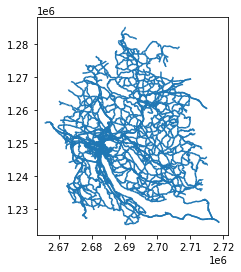

In [6]:
# Plot GeodataFrame as a map (in a graph)
data.plot()

In [7]:
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService

# URL for WFS backend
url = "http://maps.zh.ch/wfs/TBAStrZHWFS"

# Initialize
wfs = WebFeatureService(url=url)

# Get data from WFS
# Specify the parameters for fetching the data
layer = 'strassenachsen'
params = dict(service='WFS', version="1.0.0", request='GetFeature',
      typeName=layer, outputFormat='geojson')

# Parse the URL with parameters
q = Request('GET', url, params=params).prepare().url

data = gpd.read_file(q)

# print GeoDataFrame as a table
data

,length,strass_id,richtplant,stradatnam,unterhalt,eigentum,strasstyp,jahr,geometry
0,1758.337121,3134.0,30.0,546,UB7,Kanton,Regionale Verbindungsstrassen (RVS) Kanton,11_02_2021,"LINESTRING (2691745.026 1268263.103, 2691742.9..."
1,1330.092311,3135.0,40.0,,Gemeinde,Gemeinde,Gemeindestrassen,11_02_2021,"LINESTRING (2688687.595 1269114.118, 2688686.7..."
2,3329.984486,3136.0,40.0,,Gemeinde,Gemeinde,Gemeindestrassen,11_02_2021,"LINESTRING (2689697.465 1267387.596, 2689696.2..."
3,1182.467908,3137.0,40.0,,Gemeinde,Gemeinde,Gemeindestrassen,11_02_2021,"LINESTRING (2689697.465 1267387.596, 2689738.3..."
4,776.234890,3138.0,40.0,,Gemeinde,Gemeinde,Gemeindestrassen,11_02_2021,"LINESTRING (2689059.394 1266975.283, 2689061.5..."
...,...,...,...,...,...,...,...,...,...
7332,24.860195,7260.0,30.0,752,UB10,Kanton,Regionale Verbindungsstrassen (RVS) Kanton,11_02_2021,"LINESTRING (2693317.740 1249835.434, 2693308.9..."
7333,21.565694,7262.0,23.0,K-005,UB5,Kanton,Hauptverkehrsstrassen (HVS) Kanton,11_02_2021,"LINESTRING (2690671.836 1232384.488, 2690671.6..."
7334,34.620535,7263.0,23.0,K-005,UB5,Kanton,Hauptverkehrsstrassen (HVS) Kanton,11_02_2021,"LINESTRING (2690683.749 1232369.519, 2690684.8..."
7335,24.542732,7264.0,23.0,K-005,UB5,Kanton,Hauptverkehrsstrassen (HVS) Kanton,11_02_2021,"LINESTRING (2690690.750 1232393.589, 2690689.3..."


<AxesSubplot:>

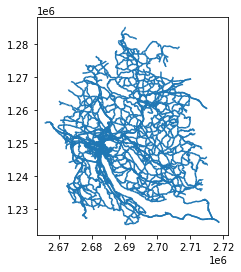

In [8]:
# Plot GeodataFrame as a map (in a graph)
data.plot()

In [15]:
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService

# URL for WFS backend
url = "http://maps.zh.ch/wfs/AVZHWFS"

# Initialize
wfs = WebFeatureService(url=url)

# Get data from WFS
# Specify the parameters for fetching the data
# Also specify a bounding box (2km x 2km) in order to get less data
layer = 'bodenbedeckung_f'
bbox="2684000,1244000,2686000,1246000"
params = dict(service='WFS', version="1.0.0", request='GetFeature',
      typeName=layer, outputFormat='geojson', bbox=bbox)

# Parse the URL with parameters
q = Request('GET', url, params=params).prepare().url

data = gpd.read_file(q)

# print GeoDataFrame as a table
data

,geodb_oid,objectid,objid,qualitaet,art,bfsnr,bearbeitungsdatum,artchid,artzhid,artzh,gvznummer,gwr_egid,geometry
0,312964511,683238,1043_2563,AV93,Gartenanlage,161,04.12.2006,11,24,Hausumschwung humusiert,,NaN,"POLYGON ((2685834.126 1244093.343, 2685833.322..."
1,312963473,686365,1043_958,AV93,Gartenanlage,161,04.12.2006,11,24,Hausumschwung humusiert,,NaN,"POLYGON ((2685803.561 1244586.238, 2685803.664..."
2,312964671,685682,1043_7278,AV93,Gartenanlage,161,06.01.2010,11,24,Hausumschwung humusiert,,NaN,"POLYGON ((2685988.752 1244509.288, 2685986.123..."
3,312966108,684165,1043_6834,AV93,befestigte Fläche,161,04.12.2006,7,18,Hausumschwung befestigt,,NaN,"POLYGON ((2685568.177 1244287.109, 2685571.366..."
4,312963003,685548,1043_4525,AV93,Gebäude,161,04.12.2006,0,1,Gebäude Wohnen,957,80561.0,"POLYGON ((2685319.831 1244486.103, 2685323.786..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5351,313068585,772798,1105_93019,AV93,Gebäude,261,12.01.2020,0,1,Gebäude Wohnen,RI02216,159865.0,"POLYGON ((2685157.948 1245868.672, 2685152.281..."
5352,313068587,772800,1105_51979,AV93,Gebäude,261,12.01.2020,0,1,Gebäude Wohnen,RI01630,159478.0,"POLYGON ((2684468.425 1245874.235, 2684467.937..."
5353,313068578,772791,1105_49995,AV93,Gebäude,261,12.01.2020,0,0,Gebäude Verwaltung,RI01959,302010572.0,"POLYGON ((2684860.508 1245873.579, 2684860.800..."
5354,313068591,772804,1105_10175,AV93,fliessendes Gewässer,261,18.02.2019,15,33,Fliessgewässer,,NaN,"POLYGON ((2685907.163 1245874.699, 2685906.967..."


<AxesSubplot:>

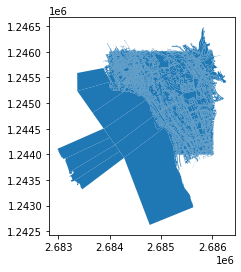

In [16]:
# Plot GeodataFrame as a map (in a graph)
data.plot()

Visualize everything with Leaflet ()